In [1]:
import numpy as nnp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cluster_mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.shape

(392, 9)

In [5]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [8]:
df_dummies = pd.get_dummies(df.drop('name',axis=1))

In [9]:
df_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaled_data = scaler.fit_transform(df_dummies) 

In [13]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [25]:
df_scaled = pd.DataFrame(scaled_data,columns=df_dummies.columns)

In [26]:
df_scaled

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


<AxesSubplot:>

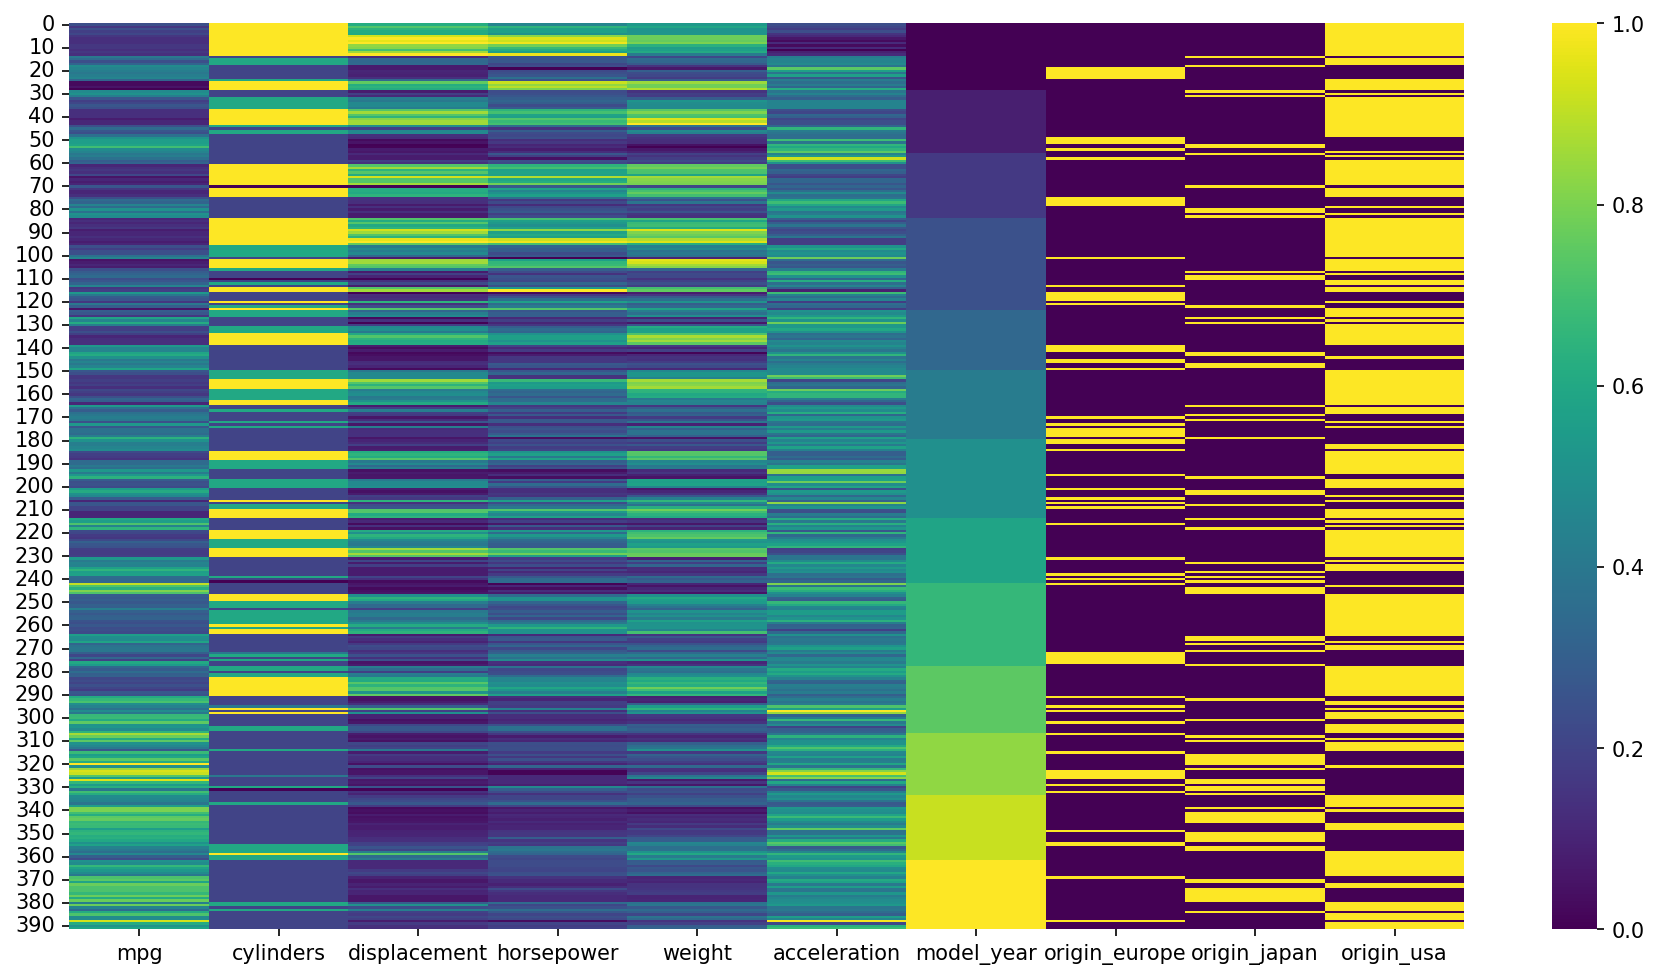

In [27]:
plt.figure(figsize=(15,8),dpi=150)
sns.heatmap(data=df_scaled,cmap='viridis')

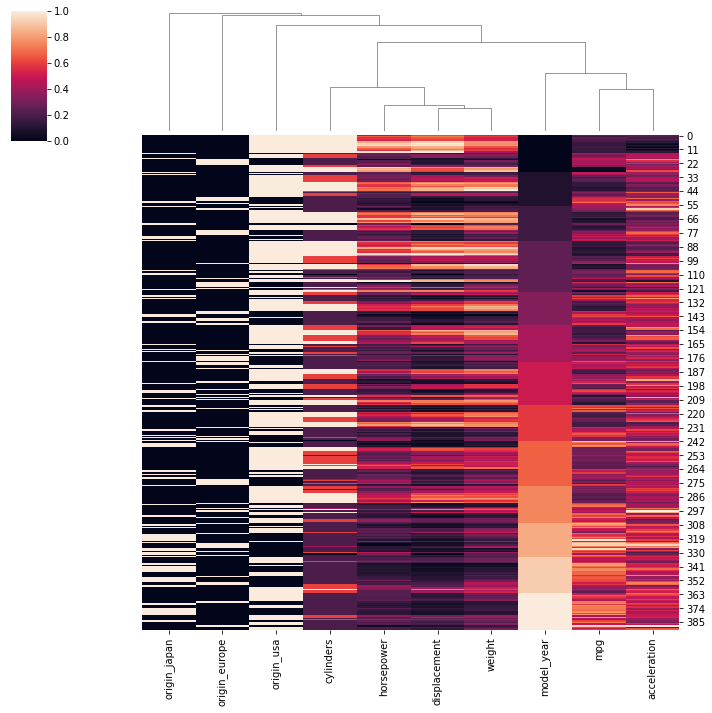

In [28]:
sns.clustermap(data=df_scaled,row_cluster=False)

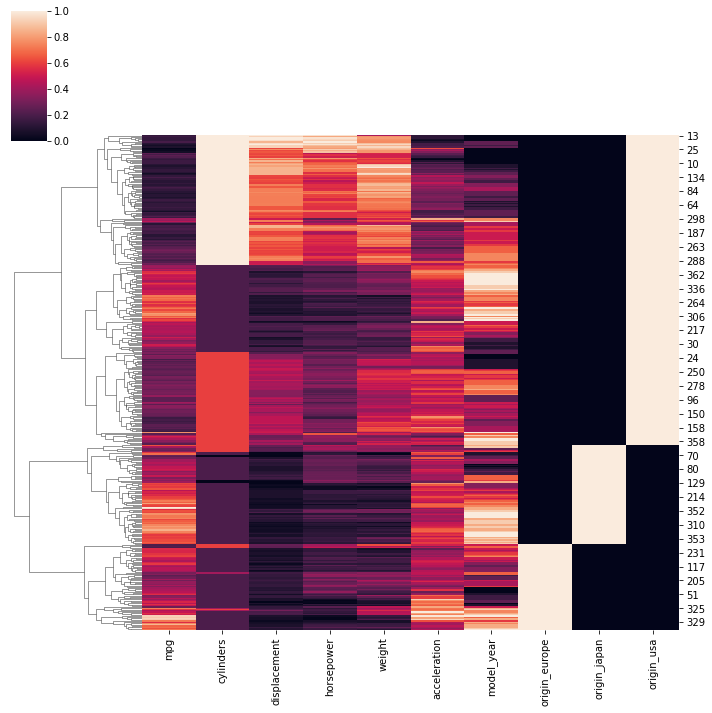

In [29]:
sns.clustermap(data=df_scaled,col_cluster=False)

In [30]:
from sklearn.cluster import AgglomerativeClustering

In [31]:
model = AgglomerativeClustering(n_clusters=4)

In [32]:
cluster_labels = model.fit_predict(scaled_data)

In [33]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

<AxesSubplot:xlabel='mpg', ylabel='weight'>

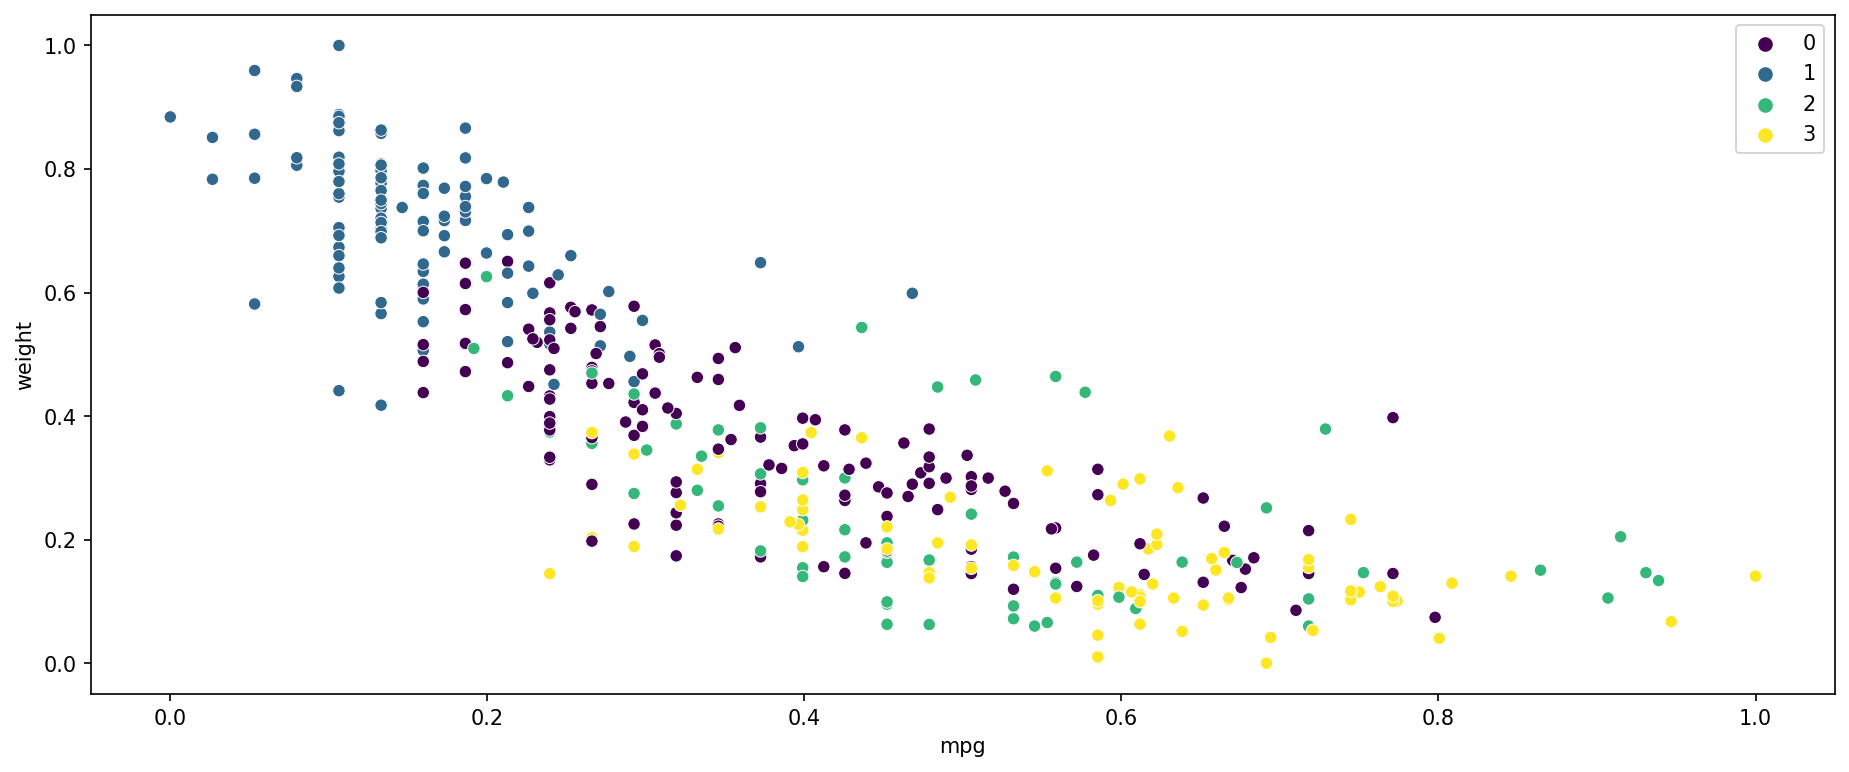

In [49]:
plt.figure(figsize=(15,6),dpi=150)
sns.scatterplot(data=df,x='mpg',y='weight',hue=cluster_labels,palette='viridis')

<AxesSubplot:xlabel='horsepower', ylabel='acceleration'>

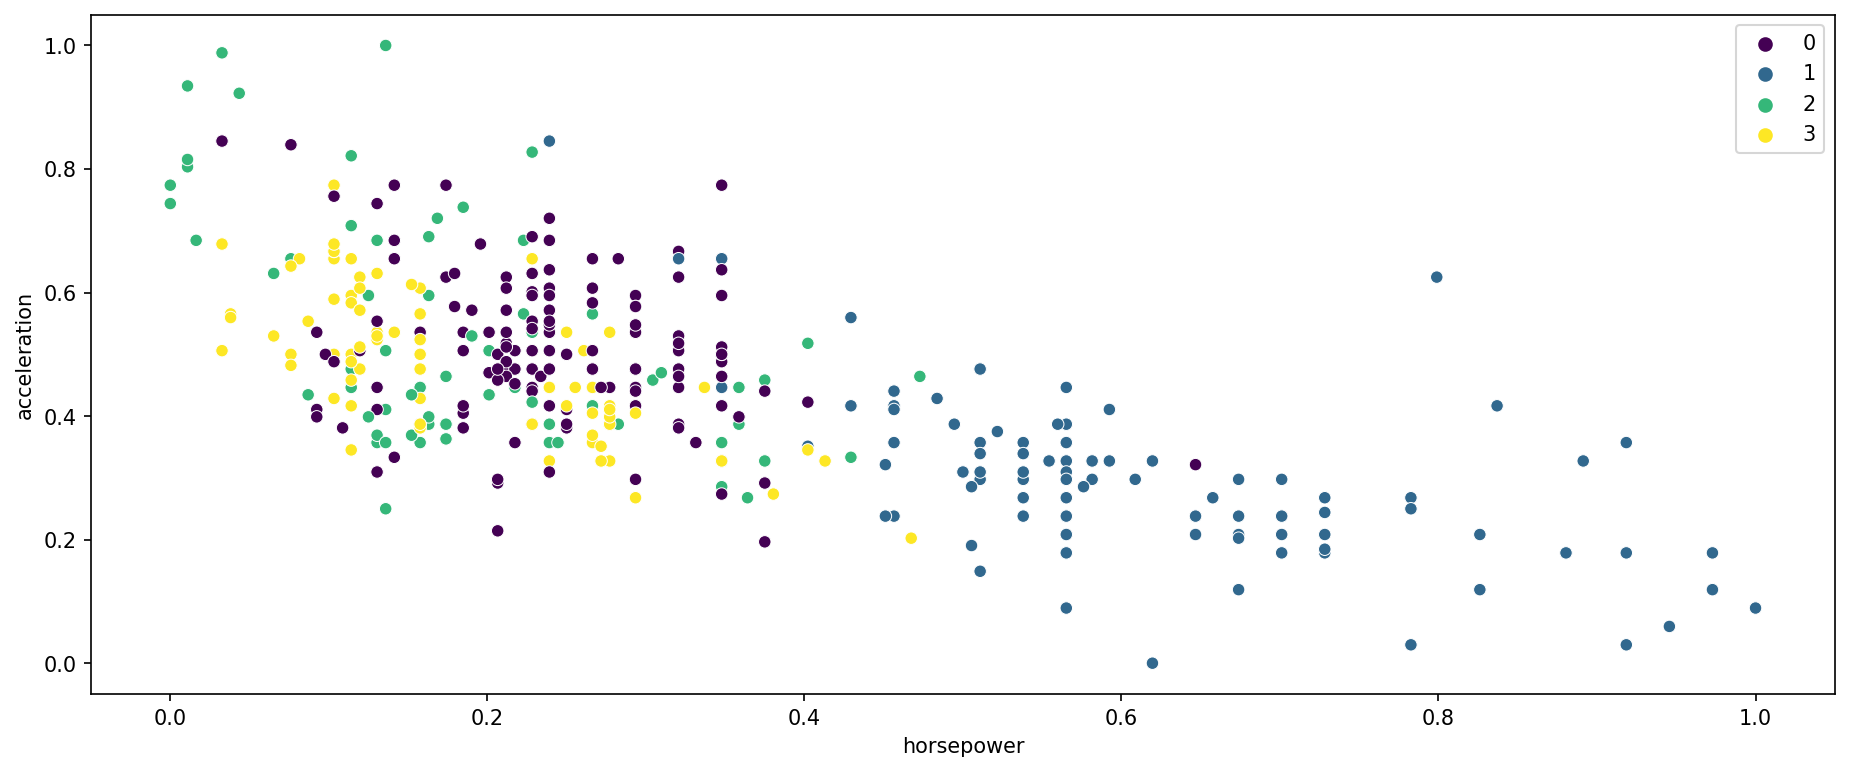

In [51]:
plt.figure(figsize=(15,6),dpi=150)
sns.scatterplot(data=df,x='horsepower',y='acceleration',hue=cluster_labels,palette='viridis')

In [52]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

In [53]:
cluster_labels = model.fit_predict(scaled_data) 

In [54]:
cluster_labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

In [57]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

In [60]:
linkage_matrix = hierarchy.linkage(model.children_)

In [62]:
linkage_matrix  #67 & 161 are clusters , 1.41421356 is the distance between 67 & 161 cluster , 2 is the no. of cluster in group 
                #formation

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

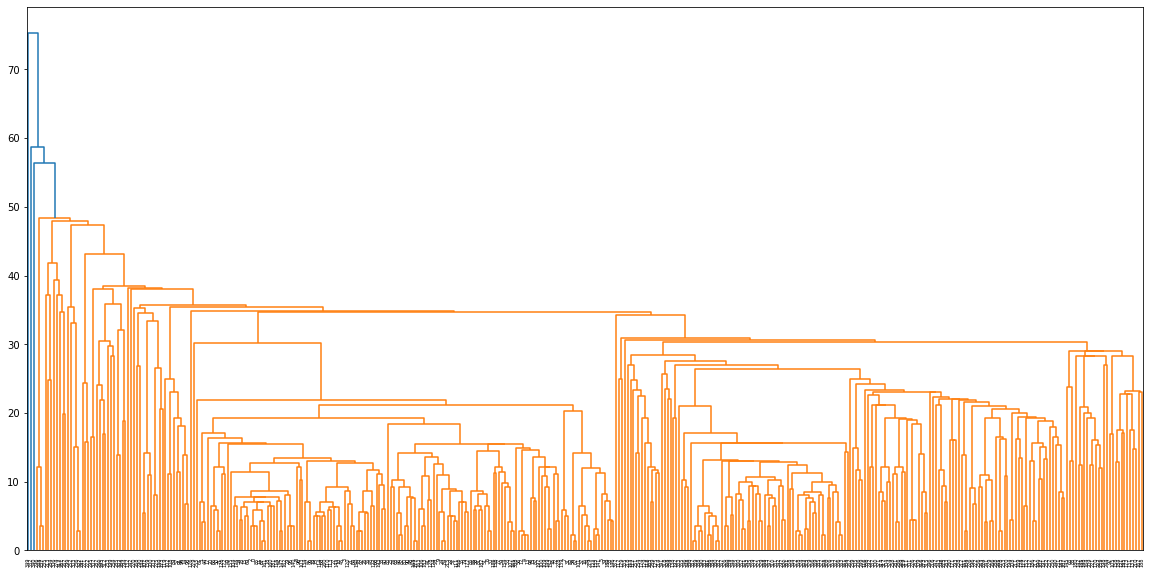

In [66]:
plt.figure(figsize=(20,10))
dendo = hierarchy.dendrogram(linkage_matrix)

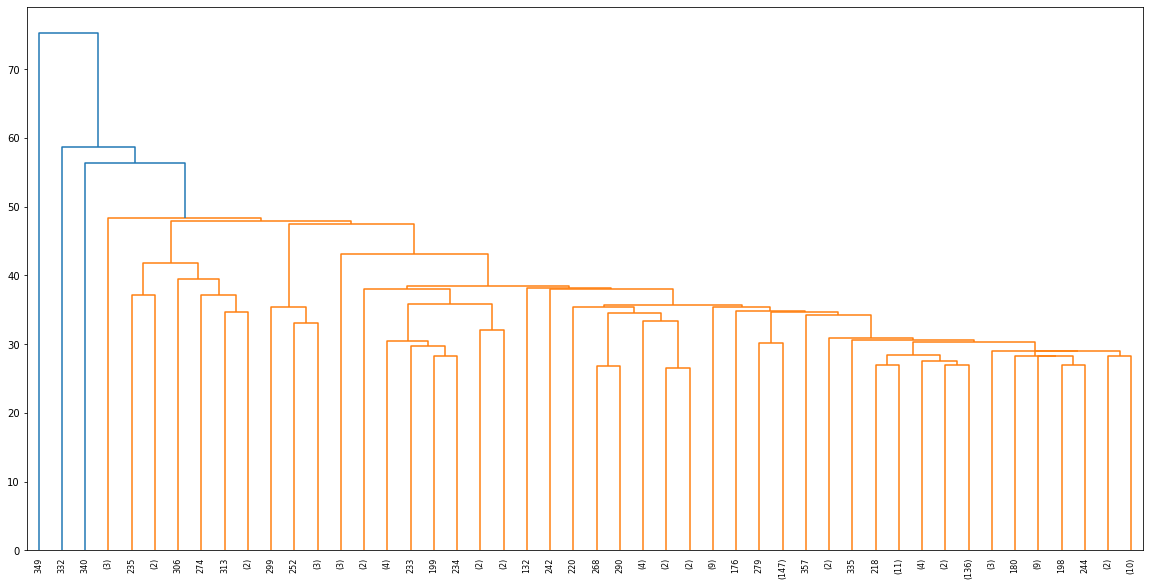

In [68]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=48)

In [69]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=2)

In [70]:
cluster_labels = model.fit_predict(scaled_data)

In [71]:
cluster_labels

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,  0,
        0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  0,
        3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,  0,
        0,  3,  0, 10,  3,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,  3,  3,
        3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,  4,  4,
        4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,  7,  1,
        0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,  5,  5,
        5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,  1,  1,
        7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,  5,  5,
        5,  5,  9,  9,  9

In [72]:
linkage_matrix = hierarchy.linkage(model.children_)

In [73]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

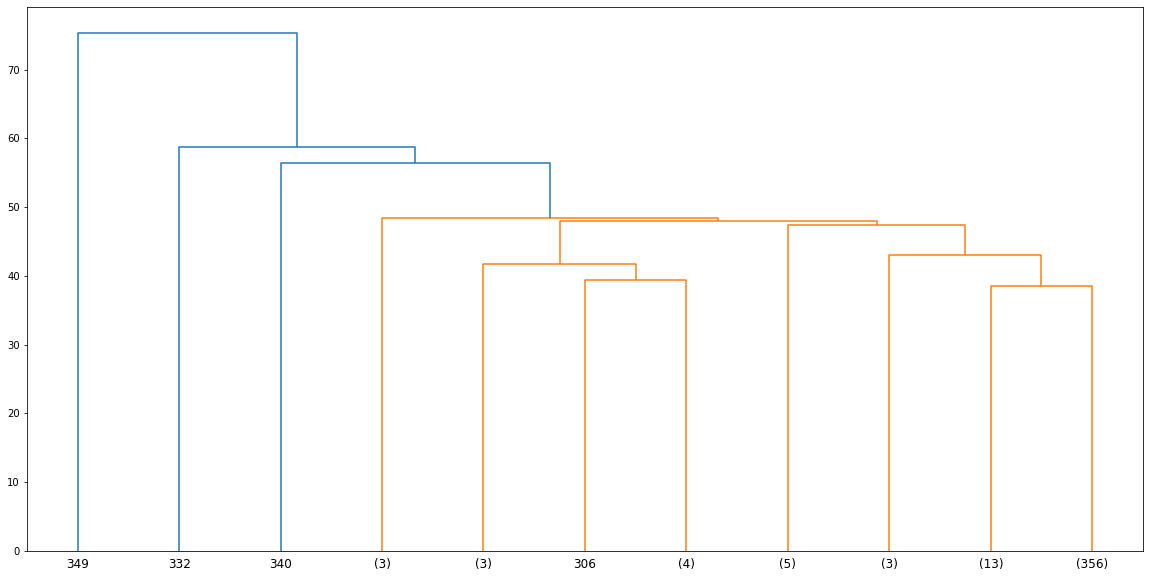

In [75]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=11)